Current working directory: C:\Users\Arpit Kumar
        date           co          no         no2         o3         so2  \
0 2021-01-01  6557.782917  138.729167  132.507500  11.186250  160.069583   
1 2021-01-02  2040.545417    3.303750   65.975833  33.814583   43.989167   
2 2021-01-03   962.695417    1.599167   34.436250  48.221667   29.632500   
3 2021-01-04  3093.639583   50.448750   60.805417   9.065000   53.256667   
4 2021-01-05  1831.372917   14.828750   55.222500  13.460833   56.248750   

        pm2_5        pm10        nh3  UP_AQI  Haryana_AQI  Wind_Speed_kmph  \
0  568.449167  658.298333  47.019583   455.0        376.0            18.73   
1  297.725833  324.191250  11.542083   448.0        336.0            47.54   
2  106.124167  117.122917   6.295417   364.0        260.0            36.60   
3  177.606667  220.551667  14.229167   152.0         65.0            29.93   
4  145.688333  167.635833  11.222917   149.0         83.0             7.80   

   Wind_Direction_deg  Win

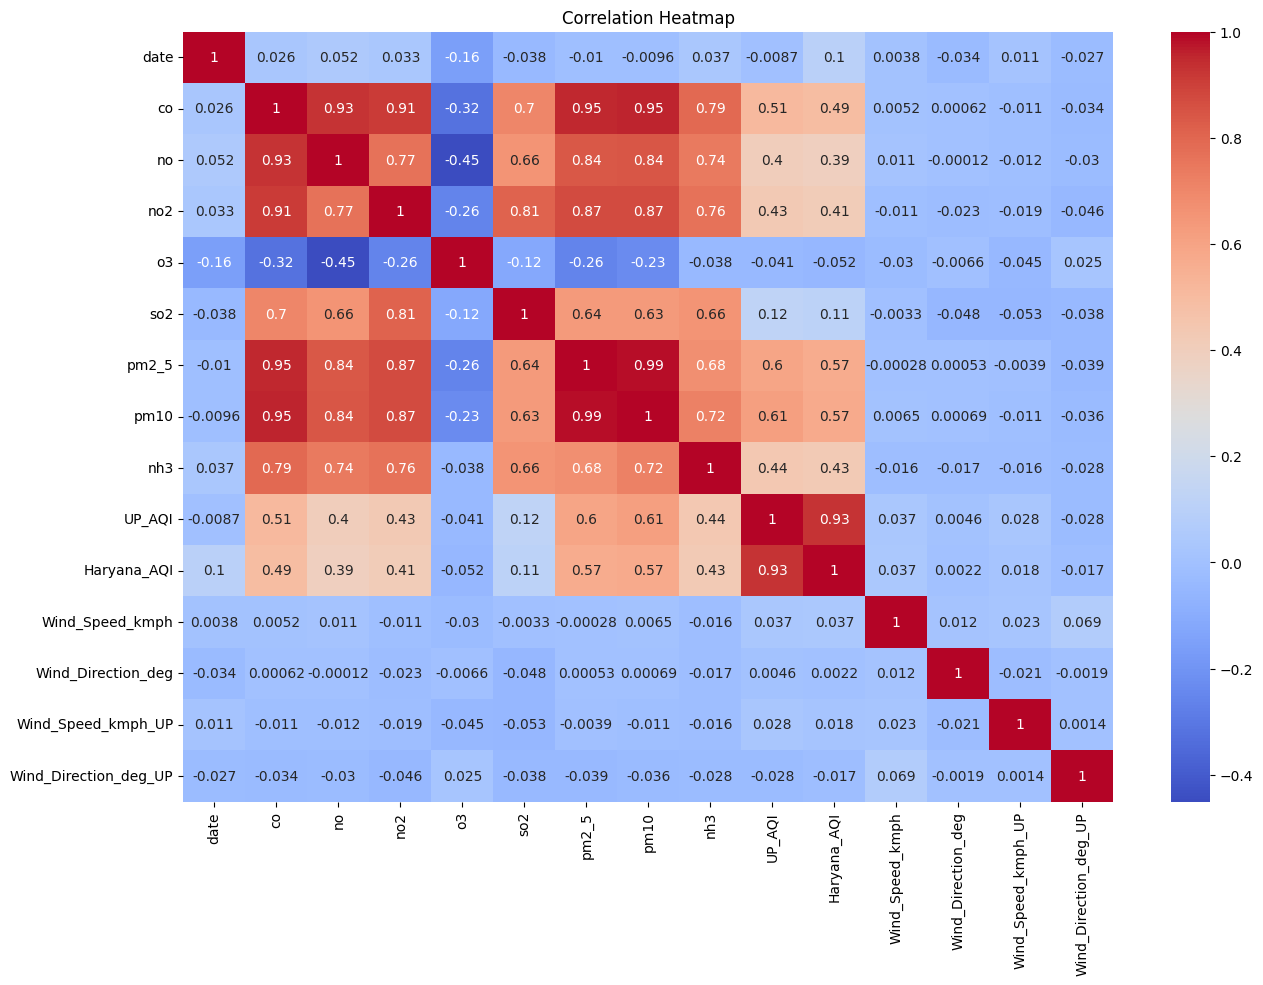

               Model       RMSE  R2 Score
0      Decision Tree  33.144042  0.967800
1      Random Forest  26.690243  0.979119
2  Linear Regression  22.616242  0.985007


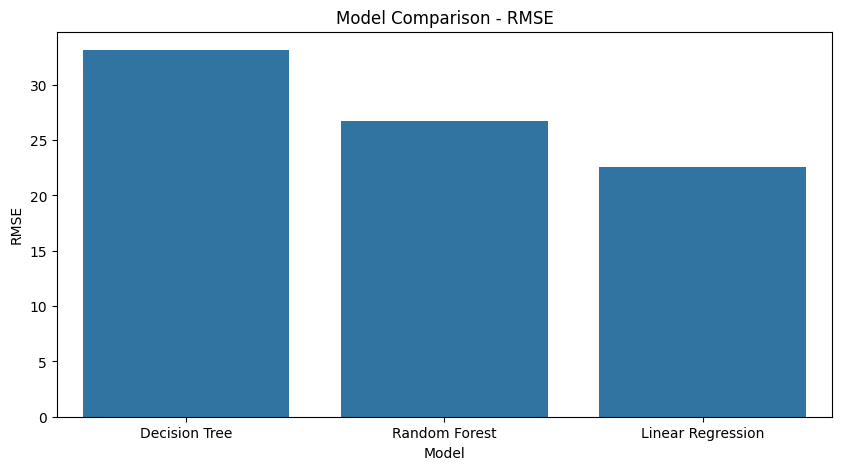

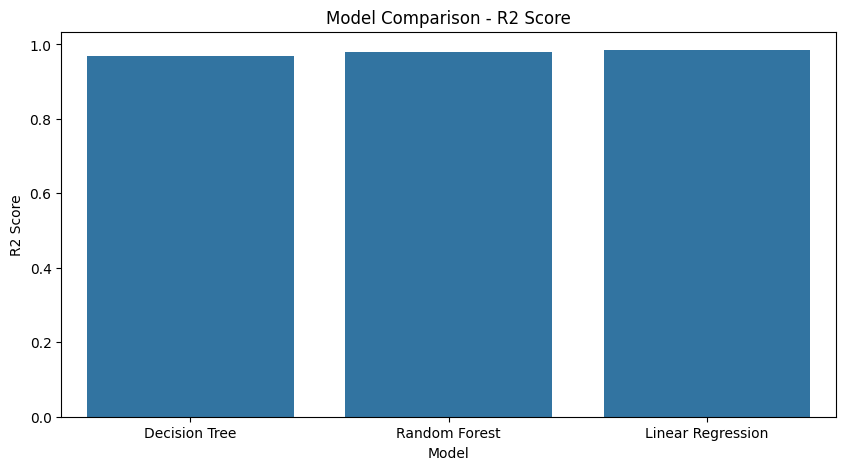

In [16]:



## Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("Current working directory:", os.getcwd())
## Loading Data
# Load the datasets
# up_pollutant = pd.read_csv('upPollutant.csv')
# haryana_pollutant = pd.read_csv('haryanaPollutant.csv')
# delhi_aqi = pd.read_csv('delhi_aqi.csv')
# wind_haryana = pd.read_csv('Wind_Data_Haryana_2021_2023.csv')
# wind_up = pd.read_csv('Wind_Data_Uttar_Pradesh_2021_2023.csv')
os.makedirs('models', exist_ok=True)
up_pollutant = pd.read_csv(r"C:\Users\Arpit Kumar\Downloads\upPollutant.csv")
haryana_pollutant = pd.read_csv(r"C:\Users\Arpit Kumar\Downloads\haryanaPollutant.csv")
delhi_aqi = pd.read_csv(r"C:\Users\Arpit Kumar\Downloads\delhi_aqi.csv")
wind_haryana = pd.read_csv(r"C:\Users\Arpit Kumar\Downloads\Wind_Data_Haryana_2021_2023.csv")
wind_up = pd.read_csv(r"C:\Users\Arpit Kumar\Downloads\Wind_Data_Uttar_Pradesh_2021_2023.csv")

# Convert date columns to datetime format
up_pollutant['date'] = pd.to_datetime(up_pollutant['date'])
haryana_pollutant['date'] = pd.to_datetime(haryana_pollutant['date'])
delhi_aqi['date'] = pd.to_datetime(delhi_aqi['date'].str.split().str[0])
wind_haryana['Date'] = pd.to_datetime(wind_haryana['Date'])
wind_up['Date'] = pd.to_datetime(wind_up['Date'])

# Rename date column in wind data for consistency
wind_haryana = wind_haryana.rename(columns={'Date': 'date'})
wind_up = wind_up.rename(columns={'Date': 'date'})

# Aggregate pollutants data by date
up_pollutant_daily = up_pollutant.groupby('date')['Index Value'].mean().reset_index().rename(columns={'Index Value': 'UP_AQI'})
haryana_pollutant_daily = haryana_pollutant.groupby('date')['Index Value'].mean().reset_index().rename(columns={'Index Value': 'Haryana_AQI'})
delhi_aqi_daily = delhi_aqi.groupby('date').mean().reset_index()

# Merge all datasets on the date column
merged_data = delhi_aqi_daily.merge(up_pollutant_daily, on='date', how='inner')
merged_data = merged_data.merge(haryana_pollutant_daily, on='date', how='inner')
merged_data = merged_data.merge(wind_haryana, on='date', how='inner', suffixes=('', '_Haryana'))
merged_data = merged_data.merge(wind_up, on='date', how='inner', suffixes=('', '_UP'))

# Drop missing values
cleaned_data = merged_data.dropna()

## Exploratory Data Analysis
# Display the first few rows of the merged dataset
print(cleaned_data.head())

# Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Selection and Train-Test Split
X = cleaned_data.drop(columns=['date', 'pm2_5'])  # Features
y = cleaned_data['pm2_5']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

### 1. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

### 2. Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

### 3. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

## Results Comparison
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Linear Regression'],
    'RMSE': [dt_rmse, rf_rmse, lr_rmse],
    'R2 Score': [dt_r2, rf_r2, lr_r2]
})

print(results)

# Barplot for comparison
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title('Model Comparison - RMSE')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='R2 Score', data=results)
plt.title('Model Comparison - R2 Score')
plt.show()


In [13]:
# Example input data (replace these values with actual data for prediction)
input_data = pd.DataFrame([{
    'co': 0.5,
    'no': 15,
    'no2': 30,
    'o3': 20,
    'so2': 10,
    'pm10': 80,
    'nh3': 5,
    'UP_AQI': 150,
    'Haryana_AQI': 160,
    'Wind_Speed_kmph': 5,
    'Wind_Direction_deg': 180,
    'Wind_Speed_kmph_UP': 5,
    'Wind_Direction_deg_UP': 190
}])

# Make predictions using all three models
dt_aqi_pred = dt_model.predict(input_data)
rf_aqi_pred = rf_model.predict(input_data)
lr_aqi_pred = lr_model.predict(input_data)

# Call the function to multiply predictions
dt_aqi_pred, rf_aqi_pred, lr_aqi_pred = predict_aqi(dt_aqi_pred, rf_aqi_pred, lr_aqi_pred)

# Display predictions from each model
print(f"Decision Tree Predicted Delhi AQI: {dt_aqi_pred[0]}")
print(f"Random Forest Predicted Delhi AQI: {rf_aqi_pred[0]}")
print(f"Linear Regression Predicted Delhi AQI: {lr_aqi_pred[0]}")


Decision Tree Predicted Delhi AQI: 184.1375
Random Forest Predicted Delhi AQI: 163.1268666666667
Linear Regression Predicted Delhi AQI: 177.94097387817894


In [14]:
import pickle

# Save each model to a pickle file
with open('models/dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

with open('models/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('models/lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)